# DSCI 503 – Project 04
### Christopher Hinton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



## Part 1: Loading the Dataset; Preliminary Analysis
In Part 1 we will load the data into a DataFrame, then explore its basic structure and characteristics.


In [2]:
fc = pd.read_csv("forest_cover.txt", sep="\t")
fc.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


Below we will determine the size of the dataset. As you will see below, this dataset has 15,120 observations, each containing 13 variables.

In [3]:
print(fc.shape)

(15120, 13)


Below we will inspect the distribution of cover types in the dataset. This will show how many observations are assigned each cover type.

In [4]:
fc["Cover_Type"].value_counts().sort_index().head(7)

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

 I will now create a list of seven colors to be used as a palette in  plots later in this notebook. 

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area 
In Part 2 we will determine the distribution of the wilderness areas within the dataset.

In [6]:
fc["Wilderness_Area"].value_counts().sort_index().head()

Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

Below we will create a DataFrame to determine the how many regions of each cover type are in each of the four wilderness areas. 

In [7]:
ct_by_wa = pd.crosstab(index=fc["Cover_Type"], 
                       columns=fc["Wilderness_Area"])
ct_by_wa.head(7)

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


Below we will visually represent the information in the above DataFrame in the form of a stacked bar chart

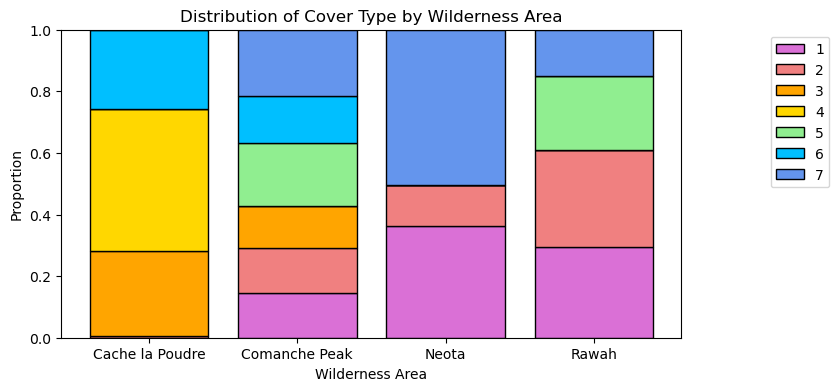

In [8]:
ct_by_wa_props = ct_by_wa / ct_by_wa.sum()

bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props

fig = plt.figure(figsize=[8, 4])

cover_types = ct_by_wa_props.index

for i, row in enumerate(cover_types):
    plt.bar(
        ct_by_wa_props.columns,
        ct_by_wa_props.iloc[i],
        bottom=bb.iloc[i],
        color=palette[i],
        edgecolor="black",
        label=row
    )

plt.xlabel("Wilderness Area")
plt.ylabel("Proportion")
plt.title("Distribution of Cover Type by Wilderness Area")

plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

plt.show()

## Part 3: Distribution of Cover Type by Soil Type
Below we will start by determining the number of regions of each cover type there are for each of the 40 soil types.

In [9]:
ct_by_st = pd.crosstab(index=fc["Cover_Type"], 
                       columns=fc["Soil_Type"])
ct_by_st.head(10)

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


Below I will visually represent the information above in the form of a stacked bar chart. 

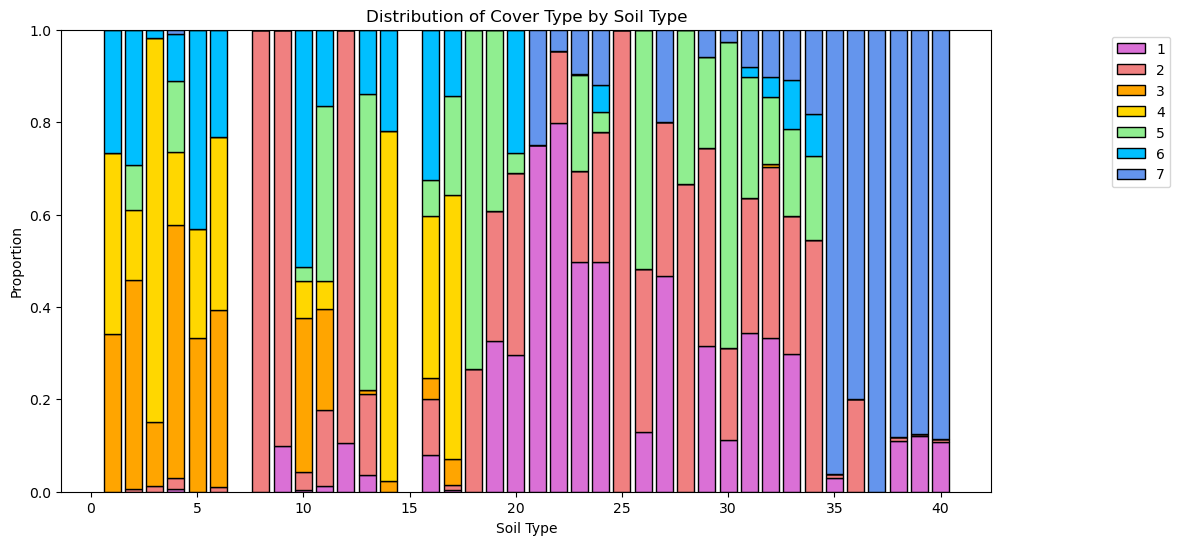

In [10]:
plt.figure(figsize=[12,6])

ct_by_st_props = ct_by_st / ct_by_st.sum()

bb = np.cumsum(ct_by_st_props) - ct_by_st_props

cover_types = ct_by_st_props.index

for i, row in enumerate(cover_types):
    plt.bar(
        ct_by_st_props.columns,
        ct_by_st_props.iloc[i],
        bottom=bb.iloc[i],
        color=palette[i],
        edgecolor="black",
        label=row
    )

plt.xlabel("Soil Type")
plt.ylabel("Proportion")
plt.title("Distribution of Cover Type by Soil Type")

plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

## Part 4: Distribution of Elevation by Cover Type
In Part 4 we will explore the relationship between cover type and elevation.  We will start by calculating the average elevation for each of the seven cover types.

In [11]:
fc.loc[:, ["Elevation", "Cover_Type"]].groupby("Cover_Type").mean(numeric_only=True).head(10)

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


Below I will create histograms to visually explore the distribution of elevations for each of the seven cover types.

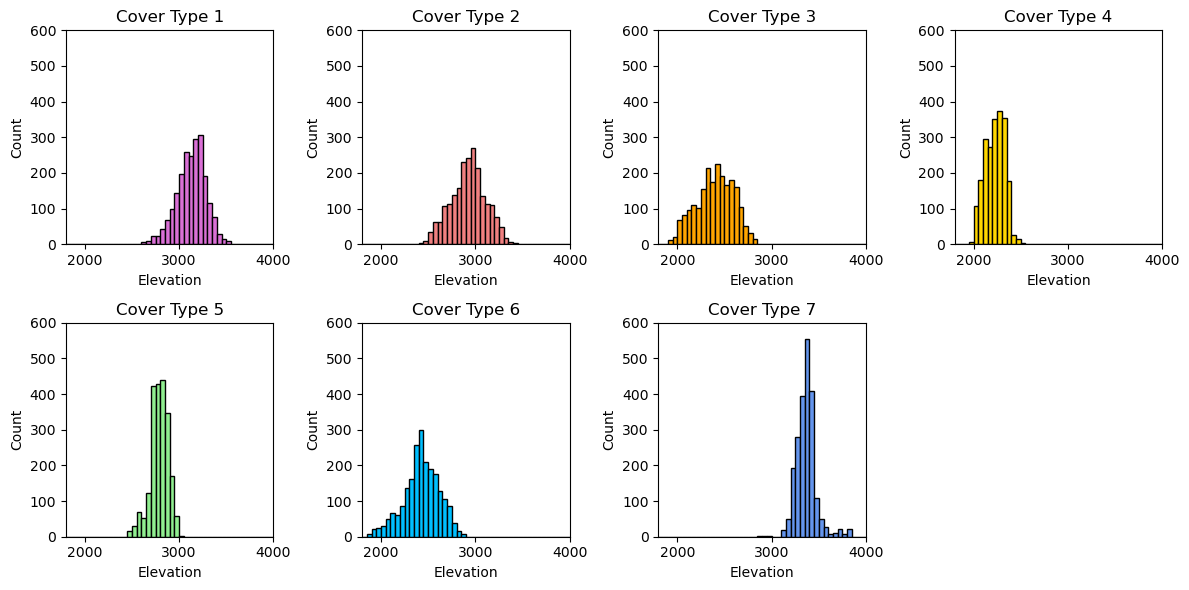

In [12]:
plt.figure(figsize=[12, 6])

for i in range(1,8):
    plt.subplot(2, 4, i)
    x_ = fc.loc[:, "Elevation"][fc["Cover_Type"] == i]
    
    plt.hist(x=x_, bins=np.arange(1800, 4050, 50), color=palette[i-1], 
             edgecolor="black")
    plt.title(f"Cover Type {i}")
    plt.xlim([1800,4000]) 
    plt.ylim([0,600])
    plt.xlabel("Elevation")
    plt.ylabel("Count")
    
plt.tight_layout()
plt.show()    

## Part 5: Creating Training, Validation, and Test Sets
In Part 5 I will encode the categorical variables and create training, validation, and test sets.  Below I will start by separating the categorical features, the numerical features, and the labels.

In [27]:
X_num = np.array(fc.loc[:, "Elevation" : "Horizontal_Distance_To_Fire_Points"])
X_cat = np.array(fc.loc[:, ["Wilderness_Area", "Soil_Type"]])
y = np.array(fc.loc[:, "Cover_Type"])


print(f"""Numerical Feature Array Shape:   {X_num.shape}
Categorical Feature Array Shape: {X_cat.shape}
Label Array Shape:               {y.shape}""")

Numerical Feature Array Shape:   (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape:               (15120,)


In [31]:
print(X_num.shape, type(X_num))
print(y)


(15120, 10) <class 'numpy.ndarray'>
[5 5 2 ... 3 3 3]


Below I will now be encoding the categorical variables using one-hot encoding.  This will allow the machine learning algorithm to more effectively analyze the data.

In [14]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X_cat)
X_enc = encoder.transform(X_cat)

print(f"Encoded Feature Array Shape: {X_enc.shape}")

Encoded Feature Array Shape: (15120, 42)


Below I will now combine the numerical features with the encoded features.

In [15]:
X = np.hstack((X_num, X_enc))

print(f"Feature Array Shape: {X.shape}")

Feature Array Shape: (15120, 52)


Below we will now split the data into training, validation, and test sets, using a 70/15/15 split.

In [16]:
X_train, X_hold, y_train, y_hold = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)


print(f"""Training Features Shape: {X_train.shape}
Validation Features Shape: {X_valid.shape}
Test Features Shape: {X_test.shape}""")

Training Features Shape: (10584, 52)
Validation Features Shape: (2268, 52)
Test Features Shape: (2268, 52)


## Part 6: Logistic Regression Model
In Part 6, I will create and evaluate a logistic regression model.


In [17]:
lr_mod = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000, 
                            multi_class="multinomial").\
                            fit(X_train, y_train)

print(f"""Training Accuracy: {lr_mod.score(X_train, y_train):.4f}
Validation Accuracy: {lr_mod.score(X_valid, y_valid):.4f}""")


Training Accuracy: 0.6159
Validation Accuracy: 0.6190


C:\Users\cdhin\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part 7: Decision Tree Models
In Part 7 we will see several decision tree models, each with a different value for the max depth. For each parameter value, we will calculate the training and validation accuracy. We will use the validation scores to select the optimal value for max depth.

In [18]:
dt_train_acc = []
dt_valid_acc = []
depth_range = range(2, 31)

for depth in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=depth)
    temp_tree.fit(X_train, y_train)
    
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))
    
    # Earse later
    #print(f"Index: {depth}  Depth: {dt_valid_acc[depth-2]:.4f}\n")
    
dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]

opt_train_acc = dt_train_acc[dt_idx]
opt_valid_acc = dt_valid_acc[dt_idx]

print(f"""Optimal value for max_depth:           {dt_opt_depth}
Training Accuracy for Optimal Model:   {opt_train_acc:.4f}
Validation Accuracy for Optimal Model: {opt_valid_acc:.4f}""")

Optimal value for max_depth:           18
Training Accuracy for Optimal Model:   0.9804
Validation Accuracy for Optimal Model: 0.7720


Below I will plot the training and validation curves as a function of max_depth.

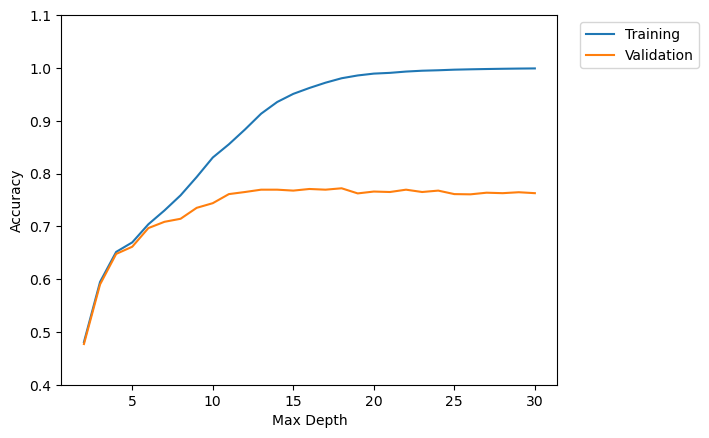

In [19]:
plt.figure()

plt.plot(depth_range, dt_train_acc)
plt.plot(depth_range, dt_valid_acc)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.ylim(0.4, 1.1)
plt.legend(["Training", "Validation"], loc="upper right", bbox_to_anchor=(1.3, 1))

plt.show()

## Part 8: Random Forest Models
In Part 8 I will create and evaluate several random forest models. We will now create several random forest models, each with a different value for the max_depth parameter. For each parameter value, we will calculate the training and validation accuracy. We will use the validation scores to select the optimal value for max_depth. 

In [20]:
rf_train_acc = [] 
rf_valid_acc = []

for depth in depth_range:
    np.random.seed(1)
    
    temp_forest = RandomForestClassifier(max_depth=depth, 
                                         n_estimators=100)
    temp_forest.fit(X_train, y_train)
    
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))
    
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[dt_idx]

opt_train_acc = rf_train_acc[rf_idx]
opt_valid_acc = rf_valid_acc[rf_idx]

print(f"""Optimal value for max_depth:           {rf_opt_depth}
Training Accuracy for Optimal Model:   {opt_train_acc:.4f}
Validation Accuracy for Optimal Model: {opt_valid_acc:.4f}""")

Optimal value for max_depth:           18
Training Accuracy for Optimal Model:   1.0000
Validation Accuracy for Optimal Model: 0.8677


Below I will plot the training and validation curves as a function of max_depth.

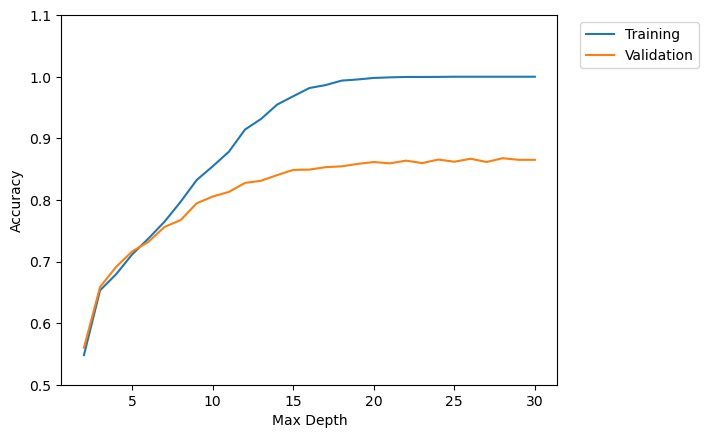

In [21]:
plt.figure()

plt.plot(depth_range, rf_train_acc)
plt.plot(depth_range, rf_valid_acc)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)
plt.legend(["Training", "Validation"], loc="upper right", bbox_to_anchor=(1.3, 1))

plt.show()

## Part 9: Create and Evaluate Final Model 
In Part 9 we will select our final model, and will evaluate it on the test set.  I have selected the Random Forrest model for the final model due to it having the highest accuracy on the validation model, with a depth of 18. 

In [22]:
np.random.seed(1)
final_model = RandomForestClassifier(max_depth=18, n_estimators=100)
final_model.fit(X_train, y_train)

fm_train_acc = final_model.score(X_train, y_train)
fm_valid_acc = final_model.score(X_valid, y_valid)
fm_test_acc = final_model.score(X_test, y_test)
print(f"""
Training Accuracy for Final Model:   {fm_train_acc:.4f}
Validation Accuracy for Final Model: {fm_valid_acc:.4f}
Testing Accuracy for Final Model:    {fm_test_acc:.4f}
""")


Training Accuracy for Final Model:   0.9937
Validation Accuracy for Final Model: 0.8545
Testing Accuracy for Final Model:    0.8496



Below we will now create and display a confusion matrix detailing the model's performance on the test set. 

In [23]:
test_pred = final_model.predict(X_test)
fm_cm = confusion_matrix(y_test, test_pred)
df_fm_cm = pd.DataFrame(fm_cm, index=range(1,8), columns=range(1,8))

df_fm_cm.head(10)

,1,2,3,4,5,6,7
1,233,61,2,0,6,0,22
2,59,228,7,0,19,8,3
3,0,1,259,18,2,44,0
4,0,0,6,314,0,4,0
5,0,10,5,0,304,5,0
6,0,0,37,10,2,275,0
7,9,1,0,0,0,0,314


Finally we will now generate a classification report to provide further insight into the model's performance on the test set. 

In [24]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.77      0.72      0.75       324
           2       0.76      0.70      0.73       324
           3       0.82      0.80      0.81       324
           4       0.92      0.97      0.94       324
           5       0.91      0.94      0.93       324
           6       0.82      0.85      0.83       324
           7       0.93      0.97      0.95       324

    accuracy                           0.85      2268
   macro avg       0.85      0.85      0.85      2268
weighted avg       0.85      0.85      0.85      2268

